# Multi-dimensional arrays

One place that NumPy arrays really start excelling is that they are good at handling multi-dimensional data.

If you pass in a list-of-lists (of equal lengths) it will create a two-dimensional array:

In [1]:
import numpy as np

In [4]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
print(grid)

[[1 2 3]
 [4 5 6]]


You can ask any `array` for how many dimensions it has:

In [3]:
grid.ndim

2

Or get more detail on exactly how large it is in each dimension with:

In [4]:
grid.shape

(2, 3)

So it has two dimensions, one of size 2 and one size 3 (i.e. it's $2\times3$).

If you access a multi-dimensional array using a single number in the square brackets then it will give you the data by row. For example, to pull out the first row:

In [5]:
grid[0]

array([1, 2, 3])

![](../assets/diag_03-1.png) 

or the second row:

In [5]:
grid[1]

array([4, 5, 6])

![](../assets/diag_03-2.png) 

Then you can get individual elements by specifying multiple indices inside the square brackets. For example, to get the first row and the second column:

In [6]:
grid[0, 1]

2

![](../assets/diag_03-3.png) 

This is useful as it also allows you to select the data by *column* using `:` to mean "all":

In [7]:
grid[:, 1]

array([2, 5])

![](../assets/diag_03-4.png) 

So, when the array is printed out, the order that you put indices into the `[]` when indexing first selects the "row" and then selects the "column". In NumPy-speak these are called *axes* and are numbered from 0 in order. In the example of our grid, they are:

![](../assets/diag_03-5.png) 

### Exercise 5

> - Extract the number `5` from the array above using the correct combination of indices
> - Extract the last column (the answer should be `[3 6]`)
> - Extract just the last two elements from the middle row, i.e. giving `[5 6]`



In [7]:
# Write your exercise code here.


[<small>answer</small>](../solutions/multi_indexing.ipynb)

### Even more dimensions

NumPy arrays can handle any number of dimensions up to 32. So you can make a three-dimensional cube of numbers with:

In [8]:
cube = np.array([[[1,2], [3, 4]], [[5, 6], [7, 8]]])
print(cube)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


You can index the values in it just as before, separating each axes index with a comma:

In [9]:
cube[0, 0, 0]

1

Notice how the array is represented when it's printed. Each "row" of the cube is now a 2-D sub-array, separated by an blank line.

In labelled diagram form, it looks like:

![](../assets/diag_03-6.png) 

See that the numbers along the row are always the last axis (they were axis 1 before, now they're axis 2).

### Exercise 6

> 1. Find the number of dimensions and shape of the array `cube`.
> 2. Extract some more slices of the array, taking care to understand how the order of the indices relate to the data inside. Try to work out the indexing required to get the following results from `cube`:
>    - ```
>      8
>      ```
>    - ```
>      [1 2]
>      ```
>    - ```
>      [2 6]
>      ```
>    - ```
>      [[3 4]
>       [7 8]]
>      ```


In [10]:
# Write your exercise here.


[<small>answer</small>](../solutions/multi_cube.ipynb)

## Pre-filled arrays

Just like with one-dimensional arrays we can create multi-dimensional data with the built-in functions such as `np.zeroes`:

In [11]:
np.zeros(shape=(2, 7))

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

`np.ones`:

In [12]:
np.ones(shape=(3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

and even more complex functions such as [`np.fromfunction`](https://numpy.org/doc/stable/reference/generated/numpy.fromfunction.html) which takes an argument of a function which, when called with $x$ and $y$ values, returns a corresponding output value for that coordinate. So something like

$$
\mathrm{trig} : (x, y) \mapsto \sin(x) - \cos(y) + \frac{y}{4}
$$

can be created with:

In [13]:
def trig(x, y):
    x = np.radians(x)  # Convert from degrees to radians
    y = np.radians(y)  # Convert from degrees to radians
    return np.sin(x) - np.cos(y) + y/4

trig_grid = np.fromfunction(trig, shape=(720, 720))
trig_grid

array([[-1.        , -0.99548437, -0.99066418, ...,  2.12987315,
         2.13347518,  2.13738164],
       [-0.98254759, -0.97803197, -0.97321177, ...,  2.14732556,
         2.15092759,  2.15483404],
       [-0.9651005 , -0.96058488, -0.95576468, ...,  2.16477265,
         2.16837468,  2.17228113],
       ...,
       [-1.05233596, -1.04782033, -1.04300014, ...,  2.07753719,
         2.08113922,  2.08504568],
       [-1.0348995 , -1.03038387, -1.02556368, ...,  2.09497365,
         2.09857568,  2.10248214],
       [-1.01745241, -1.01293678, -1.00811659, ...,  2.11242074,
         2.11602277,  2.11992923]])

## Plotting 2D data

Complex multi-dimensional arrays are hard to visualise as text, so let's see about displaying them graphically. The simplest way to do this is using matplotlib's [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) function:

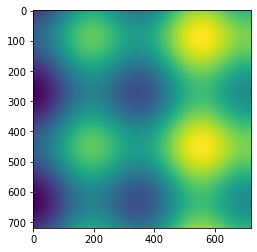

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(trig_grid)

This takes any 2D array and displays it as if it were an image. It will set the colour based on the value. One thing to be aware of is that the orign of the axes is in the top-left, rather than the bottom-left (due to conventions on how image data is stored). You can change this by passing `origin="lower"` to the function:

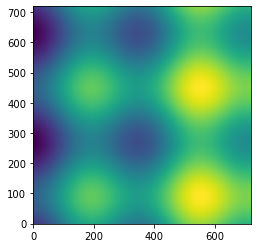

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(trig_grid, origin="lower")

It's also useful to be able to display a colour bar as well the data itself, which you can do with `fig.colorbar` and passing it the return value of the `imshow` call:

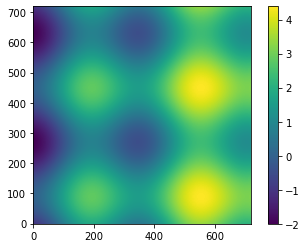

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(trig_grid, origin="lower")

fig.colorbar(im)

You can change the [colour scheme](https://matplotlib.org/stable/tutorials/colors/colormaps.html) used to plot with the `cmap` argument:

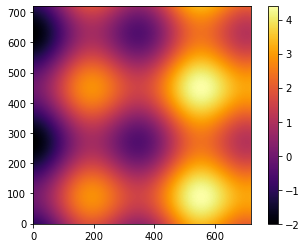

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(trig_grid, origin="lower", cmap="inferno")

fig.colorbar(im)

There are other two-dimensional (and even three-dimensional) plotting types available, such as the [`contour` plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html):

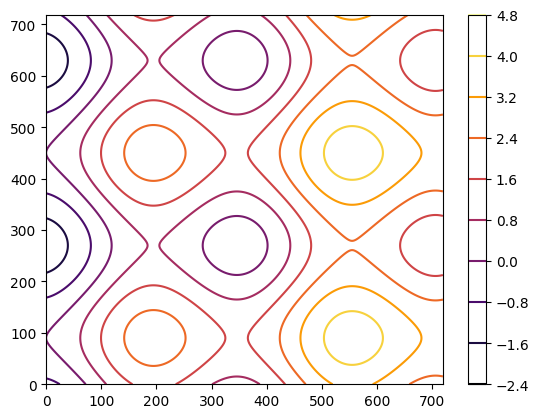

In [18]:
fig, ax = plt.subplots()
im = ax.contour(trig_grid, cmap="inferno")

fig.colorbar(im)

### Exercise 7

> There is a NumPy data file in the week_4 directory at `week_4/assets/weather_data`. From this file we want to grab the `"temperature"` array. 
You can load in the data with:
>
>```python
>with np.load("../assets/weather_data.npz") as weather:
>    temperature = weather["temperature"]
>```
><br>
>
>This data is based on [ECMWF data](https://apps.ecmwf.int/codes/grib/param-db/?id=130) and is in units of Kelvin. It is three-dimensional with axes of altitude, latitude and longitude. The altitude axis is layered such that the 0<sup>th</sup> layer is ground-level and each layer beyond that increases in altitude.
>
>Since this is three-dimensional data, it's worth exploring its shape first. Once you understand the data:>>
>
>1. Grab the ground level slice
    - Calculate the average value of this slice (this should give you a single number)
    - Plot the entire slice
>2. Plot a vertical profile of temperatures for a location of your choice (i.e. temperature on the x-axis and altitude/vertical index on the y-axis)
    - you can choose what goes on which axis by providing two explicit arguments to the [plot command](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
    - try to select multiple temperature profiles and show them all in one figure (you can follow [these examples](https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/) to achieve this)
    - use the [matplotlib subplots demo page](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to plot each temperature profile on its own subplot
>3. Calculate the mean over each vertical column to make it two-dimensional
    - you can pass e.g. `axis=0` argument to `np.mean` to have it average along one axis only
    - Plot this array too
>4. For the ground-level slice, calculate the average temperature by latitude
    - Plot this too
    - Try to also switch the axes, showing the latitude index on the y-axis and the the average temperature on the x-axis


In [18]:
# Write your exercise code here.


[<small>answer</small>](../solutions/multi_weather.ipynb)

## [[Previous: Operations on NumPy arrays](./02-operations.ipynb)] | [[Next: Filtering data](./04-filtering_data.ipynb)]